# 1. Import and Install Dependencies

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic
mp_face_mesh = mp.solutions.face_mesh # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)# COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_CONTOURS)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [6]:
def draw_styled_landmarks(image,results):
    #Styling face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_CONTOURS,
                             mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,100),thickness=1, circle_radius=1))
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,30),thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,44,222),thickness=1, circle_radius=1))
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,110,10),thickness=2, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(100,80,111),thickness=2, circle_radius=1))
    
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,110,10),thickness=2, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(100,80,111),thickness=2, circle_radius=1))

In [63]:
cap = cv2.VideoCapture(0)

#DSLR
#cap.set(3, 1920)
#cap.set(4, 1080)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        
        #Detection
        image, results= mediapipe_detection(frame,holistic)
        
        #Draw Landmarks
        draw_styled_landmarks(image, results)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)
        
        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [8]:
results.face_landmarks

landmark {
  x: 0.6826300621032715
  y: 0.5057073831558228
  z: -0.038852259516716
}
landmark {
  x: 0.6899576783180237
  y: 0.43085166811943054
  z: -0.07210198789834976
}
landmark {
  x: 0.6845609545707703
  y: 0.45342448353767395
  z: -0.03770957142114639
}
landmark {
  x: 0.6764346957206726
  y: 0.36560702323913574
  z: -0.05695754289627075
}
landmark {
  x: 0.6910892724990845
  y: 0.41036131978034973
  z: -0.07707136869430542
}
landmark {
  x: 0.6904895901679993
  y: 0.384305477142334
  z: -0.07216303050518036
}
landmark {
  x: 0.6870569586753845
  y: 0.320988267660141
  z: -0.03664860129356384
}
landmark {
  x: 0.5773187279701233
  y: 0.31528228521347046
  z: 0.002172130858525634
}
landmark {
  x: 0.6872770190238953
  y: 0.26793575286865234
  z: -0.029153792187571526
}
landmark {
  x: 0.6886380910873413
  y: 0.23897784948349
  z: -0.03263067826628685
}
landmark {
  x: 0.6901403069496155
  y: 0.14503082633018494
  z: -0.020744655281305313
}
landmark {
  x: 0.6819759011268616
  y: 

In [9]:
draw_landmarks(frame, results)

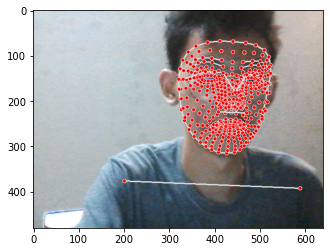

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
len(results.left_hand_landmarks)

TypeError: object of type 'NoneType' has no len()

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [19]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (Temp/ipykernel_3824/1373052555.py, line 2)

In [20]:
pose.shape

(132,)

In [21]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [22]:
extract_keypoints(results)[:-10]

array([ 0.69710815,  0.37732422, -1.64216924, ...,  0.        ,
        0.        ,  0.        ])

In [23]:
result_test = extract_keypoints(results)

In [24]:
#result_test

In [25]:
np.save('0', result_test)

In [26]:
np.load('0.npy')

array([ 0.69710815,  0.37732422, -1.64216924, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [27]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
#actions = np.array(['Nama', 'Aku', 'A','B','Y','Bangun','Tidur','Gosok','Gigi'])
actions = np.array(['nama', 'aku','aby'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [28]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [24]:
cap = cv2.VideoCapture(0)
cap.set(3, 1920)
cap.set(4, 1080)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.8, min_tracking_confidence=0.6) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
#cap.release()
#cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [29]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [30]:
label_map = {label:num for num, label in enumerate(actions)}

In [31]:
label_map

{'nama': 0, 'aku': 1, 'aby': 2}

In [32]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [33]:
np.array(sequences).shape

(90, 30, 1662)

In [34]:
np.array(labels).shape

(90,)

In [35]:
X = np.array(sequences)

In [36]:
X.shape

(90, 30, 1662)

In [37]:
y = to_categorical(labels).astype(int)

In [38]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [40]:
X_train.shape

(85, 30, 1662)

In [41]:
y_train.shape

(85, 3)

# 7. Build and Train LSTM Neural Network

In [42]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Conv3D, Dropout, MaxPooling2D, Flatten, Reshape, TimeDistributed, ConvLSTM2D
from tensorflow.keras.callbacks import TensorBoard
import time

In [43]:
NAME = 'LSTM-model-{}'.format(int(time.time()))
log_dir = os.path.join('Logs/{}'.format(NAME))
tb_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [44]:
keras.backend.clear_session()

In [45]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

In [46]:
history = model.fit (X_train,y_train, epochs = 200, callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 5s 1s/step - loss: 1.9800 - categorical_accuracy: 0.3882
Epoch 2/200
3/3 [==============================] - 2s 547ms/step - loss: 1.9344 - categorical_accuracy: 0.2941
Epoch 3/200
3/3 [==============================] - 2s 570ms/step - loss: 3.5807 - categorical_accuracy: 0.2588
Epoch 4/200
3/3 [==============================] - 2s 583ms/step - loss: 3.3831 - categorical_accuracy: 0.3059
Epoch 5/200
3/3 [==============================] - 2s 615ms/step - loss: 3.7146 - categorical_accuracy: 0.2235
Epoch 6/200
3/3 [==============================] - 2s 549ms/step - loss: 3.2712 - categorical_accuracy: 0.3294
Epoch 7/200
3/3 [==============================] - 2s 580ms/step - loss: 2.0629 - categorical_accuracy: 0.5059
Epoch 8/200
3/3 [==============================] - 2s 586ms/step - loss: 3.6820 - categorical_accuracy: 0.3059
Epoch 9/200
3/3 [==============================] - 2s 569ms/step - loss: 3.5767 - categorical_accuracy: 0.3882
Epoc

3/3 [==============================] - 2s 728ms/step - loss: 227.8969 - categorical_accuracy: 0.3176
Epoch 74/200
3/3 [==============================] - 2s 673ms/step - loss: 69.5790 - categorical_accuracy: 0.3647
Epoch 75/200
3/3 [==============================] - 2s 631ms/step - loss: 120.5973 - categorical_accuracy: 0.3412
Epoch 76/200
3/3 [==============================] - 2s 624ms/step - loss: 136.1931 - categorical_accuracy: 0.2941
Epoch 77/200
3/3 [==============================] - 2s 647ms/step - loss: 75.5718 - categorical_accuracy: 0.3412
Epoch 78/200
3/3 [==============================] - 2s 622ms/step - loss: 22.5662 - categorical_accuracy: 0.2588
Epoch 79/200
3/3 [==============================] - 2s 653ms/step - loss: 14.7253 - categorical_accuracy: 0.5176
Epoch 80/200
3/3 [==============================] - 2s 600ms/step - loss: 23.9768 - categorical_accuracy: 0.2118
Epoch 81/200
3/3 [==============================] - 2s 605ms/step - loss: 51.7255 - categorical_accuracy: 

3/3 [==============================] - 2s 612ms/step - loss: 0.8428 - categorical_accuracy: 0.6000
Epoch 146/200
3/3 [==============================] - 2s 601ms/step - loss: 0.8029 - categorical_accuracy: 0.5765
Epoch 147/200
3/3 [==============================] - 2s 727ms/step - loss: 0.8984 - categorical_accuracy: 0.5294
Epoch 148/200
3/3 [==============================] - 2s 700ms/step - loss: 0.9052 - categorical_accuracy: 0.5294
Epoch 149/200
3/3 [==============================] - 2s 729ms/step - loss: 0.8264 - categorical_accuracy: 0.6471
Epoch 150/200
3/3 [==============================] - 2s 609ms/step - loss: 0.8067 - categorical_accuracy: 0.5765
Epoch 151/200
3/3 [==============================] - 2s 628ms/step - loss: 0.8762 - categorical_accuracy: 0.5647
Epoch 152/200
3/3 [==============================] - 2s 574ms/step - loss: 0.7730 - categorical_accuracy: 0.6235
Epoch 153/200
3/3 [==============================] - 2s 564ms/step - loss: 0.9145 - categorical_accuracy: 0.54

In [56]:
model2_LSTM = Sequential()
model2_LSTM.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model2_LSTM.add(LSTM(128, return_sequences=True, activation='relu'))
model2_LSTM.add(LSTM(64, return_sequences=False, activation='relu'))
model2_LSTM.add(Dense(64, activation='relu'))
model2_LSTM.add(Dense(32, activation='relu'))
model2_LSTM.add(Dense(actions.shape[0], activation='softmax'))

In [57]:
model2_LSTM.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [58]:
model2_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 297       
Total params: 596,873
Trainable params: 596,873
Non-trainable params: 0
__________________________________________________

In [44]:
model2_LSTM.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
8/8 [==============================] - 5s 332ms/step - loss: 10.4536 - categorical_accuracy: 0.0938
Epoch 2/200
8/8 [==============================] - 2s 223ms/step - loss: 10.6179 - categorical_accuracy: 0.1016
Epoch 3/200
8/8 [==============================] - 2s 224ms/step - loss: 2.3506 - categorical_accuracy: 0.1016
Epoch 4/200
8/8 [==============================] - 2s 239ms/step - loss: 2.2461 - categorical_accuracy: 0.1211
Epoch 5/200
8/8 [==============================] - 2s 237ms/step - loss: 2.2285 - categorical_accuracy: 0.1172
Epoch 6/200
8/8 [==============================] - 2s 229ms/step - loss: 2.2034 - categorical_accuracy: 0.1133
Epoch 7/200
8/8 [==============================] - 2s 229ms/step - loss: 2.2023 - categorical_accuracy: 0.1094
Epoch 8/200
8/8 [==============================] - 2s 227ms/step - loss: 2.1952 - categorical_accuracy: 0.1211
Epoch 9/200
8/8 [==============================] - 2s 226ms/step - loss: 2.1903 - categorical_accuracy: 0.0938

8/8 [==============================] - 2s 259ms/step - loss: 1.2711 - categorical_accuracy: 0.4805
Epoch 75/200
8/8 [==============================] - 2s 234ms/step - loss: 1.2015 - categorical_accuracy: 0.5820
Epoch 76/200
8/8 [==============================] - 2s 246ms/step - loss: 1.1727 - categorical_accuracy: 0.5273
Epoch 77/200
8/8 [==============================] - 2s 244ms/step - loss: 1.1032 - categorical_accuracy: 0.5859
Epoch 78/200
8/8 [==============================] - 2s 244ms/step - loss: 1.4407 - categorical_accuracy: 0.4805
Epoch 79/200
8/8 [==============================] - 2s 231ms/step - loss: 1.2836 - categorical_accuracy: 0.5391
Epoch 80/200
8/8 [==============================] - 2s 246ms/step - loss: 1.2482 - categorical_accuracy: 0.5430
Epoch 81/200
8/8 [==============================] - 2s 230ms/step - loss: 1.0842 - categorical_accuracy: 0.6094
Epoch 82/200
8/8 [==============================] - 2s 223ms/step - loss: 1.3899 - categorical_accuracy: 0.5156
Epoch

8/8 [==============================] - 2s 247ms/step - loss: 0.8465 - categorical_accuracy: 0.6914
Epoch 147/200
8/8 [==============================] - 2s 260ms/step - loss: 0.6277 - categorical_accuracy: 0.7773
Epoch 148/200
8/8 [==============================] - 2s 244ms/step - loss: 0.5631 - categorical_accuracy: 0.8008
Epoch 149/200
8/8 [==============================] - 2s 237ms/step - loss: 0.5550 - categorical_accuracy: 0.8125
Epoch 150/200
8/8 [==============================] - 2s 236ms/step - loss: 0.6084 - categorical_accuracy: 0.7578
Epoch 151/200
8/8 [==============================] - 2s 247ms/step - loss: 0.8354 - categorical_accuracy: 0.6914
Epoch 152/200
8/8 [==============================] - 2s 235ms/step - loss: 0.7098 - categorical_accuracy: 0.7266
Epoch 153/200
8/8 [==============================] - 2s 252ms/step - loss: 0.5370 - categorical_accuracy: 0.7969
Epoch 154/200
8/8 [==============================] - 2s 239ms/step - loss: 0.5036 - categorical_accuracy: 0.82

In [66]:
history2 = model2_LSTM.fit(X_train, y_train, epochs=400, callbacks=[tb_callback])

Epoch 1/400
8/8 [==============================] - 3s 355ms/step - loss: 2.1969 - categorical_accuracy: 0.1133
Epoch 2/400
8/8 [==============================] - 2s 226ms/step - loss: 2.1968 - categorical_accuracy: 0.1133
Epoch 3/400
8/8 [==============================] - 2s 233ms/step - loss: 2.1969 - categorical_accuracy: 0.1133
Epoch 4/400
8/8 [==============================] - 2s 238ms/step - loss: 2.1968 - categorical_accuracy: 0.1172
Epoch 5/400
8/8 [==============================] - 2s 242ms/step - loss: 2.1968 - categorical_accuracy: 0.1172
Epoch 6/400
8/8 [==============================] - 2s 238ms/step - loss: 2.1968 - categorical_accuracy: 0.1172
Epoch 7/400
8/8 [==============================] - 2s 244ms/step - loss: 2.1968 - categorical_accuracy: 0.1172
Epoch 8/400
8/8 [==============================] - 2s 243ms/step - loss: 2.1968 - categorical_accuracy: 0.1172
Epoch 9/400
8/8 [==============================] - 2s 229ms/step - loss: 2.1967 - categorical_accuracy: 0.1172
E

KeyboardInterrupt: 

In [82]:
history2_1 = model2_LSTM.fit(X_train, y_train, epochs=400, callbacks=[tb_callback])

Epoch 1/400
8/8 [==============================] - 3s 351ms/step - loss: 6.3736 - categorical_accuracy: 0.1172
Epoch 2/400
8/8 [==============================] - 2s 229ms/step - loss: 2.1992 - categorical_accuracy: 0.1289
Epoch 3/400
8/8 [==============================] - 2s 242ms/step - loss: 2.1773 - categorical_accuracy: 0.1680
Epoch 4/400
8/8 [==============================] - 2s 237ms/step - loss: 2.1798 - categorical_accuracy: 0.1719
Epoch 5/400
8/8 [==============================] - 2s 245ms/step - loss: 2.1597 - categorical_accuracy: 0.1641
Epoch 6/400
8/8 [==============================] - 2s 229ms/step - loss: 2.1414 - categorical_accuracy: 0.1641
Epoch 7/400
8/8 [==============================] - 2s 242ms/step - loss: 2.1298 - categorical_accuracy: 0.1641
Epoch 8/400
8/8 [==============================] - 2s 215ms/step - loss: 2.1089 - categorical_accuracy: 0.1641
Epoch 9/400
8/8 [==============================] - 2s 227ms/step - loss: 2.0822 - categorical_accuracy: 0.1641
E

8/8 [==============================] - 2s 232ms/step - loss: 1.6523 - categorical_accuracy: 0.3398
Epoch 75/400
8/8 [==============================] - 2s 234ms/step - loss: 1.7832 - categorical_accuracy: 0.3242
Epoch 76/400
8/8 [==============================] - 2s 223ms/step - loss: 1.6796 - categorical_accuracy: 0.3750
Epoch 77/400
8/8 [==============================] - 2s 236ms/step - loss: 1.6056 - categorical_accuracy: 0.3633
Epoch 78/400
8/8 [==============================] - 2s 240ms/step - loss: 1.5175 - categorical_accuracy: 0.4336
Epoch 79/400
8/8 [==============================] - 2s 234ms/step - loss: 1.7002 - categorical_accuracy: 0.3711
Epoch 80/400
8/8 [==============================] - 2s 236ms/step - loss: 1.6419 - categorical_accuracy: 0.3906
Epoch 81/400
8/8 [==============================] - 2s 228ms/step - loss: 1.6371 - categorical_accuracy: 0.3828
Epoch 82/400
8/8 [==============================] - 2s 229ms/step - loss: 1.6246 - categorical_accuracy: 0.3828
Epoch

8/8 [==============================] - 2s 242ms/step - loss: 1.3528 - categorical_accuracy: 0.4727
Epoch 147/400
8/8 [==============================] - 2s 243ms/step - loss: 1.3736 - categorical_accuracy: 0.4531
Epoch 148/400
8/8 [==============================] - 2s 227ms/step - loss: 1.4239 - categorical_accuracy: 0.4375
Epoch 149/400
8/8 [==============================] - 2s 229ms/step - loss: 1.3645 - categorical_accuracy: 0.4727
Epoch 150/400
8/8 [==============================] - 2s 221ms/step - loss: 1.3153 - categorical_accuracy: 0.4961
Epoch 151/400
8/8 [==============================] - 2s 222ms/step - loss: 1.2631 - categorical_accuracy: 0.5039
Epoch 152/400
8/8 [==============================] - 2s 230ms/step - loss: 1.2966 - categorical_accuracy: 0.4688
Epoch 153/400
8/8 [==============================] - 2s 234ms/step - loss: 1.2755 - categorical_accuracy: 0.4453
Epoch 154/400
8/8 [==============================] - 2s 236ms/step - loss: 1.2522 - categorical_accuracy: 0.51

8/8 [==============================] - 2s 219ms/step - loss: 1.1596 - categorical_accuracy: 0.5508
Epoch 219/400
8/8 [==============================] - 2s 234ms/step - loss: 1.1757 - categorical_accuracy: 0.5508
Epoch 220/400
8/8 [==============================] - 2s 236ms/step - loss: 1.1551 - categorical_accuracy: 0.5625
Epoch 221/400
8/8 [==============================] - 2s 240ms/step - loss: 1.1544 - categorical_accuracy: 0.5391
Epoch 222/400
8/8 [==============================] - 2s 247ms/step - loss: 1.1566 - categorical_accuracy: 0.5234
Epoch 223/400
8/8 [==============================] - 2s 231ms/step - loss: 1.1917 - categorical_accuracy: 0.4922
Epoch 224/400
8/8 [==============================] - 2s 242ms/step - loss: 1.1429 - categorical_accuracy: 0.5664
Epoch 225/400
8/8 [==============================] - 2s 224ms/step - loss: 1.1377 - categorical_accuracy: 0.5547
Epoch 226/400
8/8 [==============================] - 2s 230ms/step - loss: 1.1619 - categorical_accuracy: 0.55

8/8 [==============================] - 2s 241ms/step - loss: 0.9905 - categorical_accuracy: 0.6289
Epoch 291/400
8/8 [==============================] - 2s 232ms/step - loss: 0.9734 - categorical_accuracy: 0.5938
Epoch 292/400
8/8 [==============================] - 2s 233ms/step - loss: 0.9701 - categorical_accuracy: 0.6055
Epoch 293/400
8/8 [==============================] - 2s 221ms/step - loss: 0.9880 - categorical_accuracy: 0.5508
Epoch 294/400
8/8 [==============================] - 2s 243ms/step - loss: 1.0647 - categorical_accuracy: 0.5703
Epoch 295/400
8/8 [==============================] - 2s 259ms/step - loss: 1.1556 - categorical_accuracy: 0.5156
Epoch 296/400
8/8 [==============================] - 2s 235ms/step - loss: 1.0732 - categorical_accuracy: 0.5195
Epoch 297/400
8/8 [==============================] - 2s 225ms/step - loss: 1.0497 - categorical_accuracy: 0.5586
Epoch 298/400
8/8 [==============================] - 2s 239ms/step - loss: 0.9771 - categorical_accuracy: 0.58

8/8 [==============================] - 2s 233ms/step - loss: 1.1519 - categorical_accuracy: 0.5039
Epoch 363/400
8/8 [==============================] - 2s 240ms/step - loss: 1.0148 - categorical_accuracy: 0.6055
Epoch 364/400
8/8 [==============================] - 2s 231ms/step - loss: 0.9944 - categorical_accuracy: 0.5859
Epoch 365/400
8/8 [==============================] - 2s 235ms/step - loss: 0.9045 - categorical_accuracy: 0.5977
Epoch 366/400
8/8 [==============================] - 2s 235ms/step - loss: 0.8982 - categorical_accuracy: 0.6250
Epoch 367/400
8/8 [==============================] - 2s 249ms/step - loss: 0.8482 - categorical_accuracy: 0.6328
Epoch 368/400
8/8 [==============================] - 2s 228ms/step - loss: 0.8595 - categorical_accuracy: 0.6328
Epoch 369/400
8/8 [==============================] - 2s 248ms/step - loss: 1.0177 - categorical_accuracy: 0.5703
Epoch 370/400
8/8 [==============================] - 2s 215ms/step - loss: 1.1187 - categorical_accuracy: 0.50

In [87]:
history2_2 = model2_LSTM.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
8/8 [==============================] - 3s 363ms/step - loss: 0.8718 - categorical_accuracy: 0.5859
Epoch 2/1000
8/8 [==============================] - 2s 233ms/step - loss: 0.8120 - categorical_accuracy: 0.6367
Epoch 3/1000
8/8 [==============================] - 2s 241ms/step - loss: 0.7880 - categorical_accuracy: 0.6953
Epoch 4/1000
8/8 [==============================] - 2s 237ms/step - loss: 0.8005 - categorical_accuracy: 0.6055
Epoch 5/1000
8/8 [==============================] - 2s 224ms/step - loss: 0.7835 - categorical_accuracy: 0.6641
Epoch 6/1000
8/8 [==============================] - 2s 240ms/step - loss: 0.8056 - categorical_accuracy: 0.6172
Epoch 7/1000
8/8 [==============================] - 2s 231ms/step - loss: 0.7860 - categorical_accuracy: 0.6719
Epoch 8/1000
8/8 [==============================] - 2s 248ms/step - loss: 0.7818 - categorical_accuracy: 0.6523
Epoch 9/1000
8/8 [==============================] - 2s 243ms/step - loss: 0.8570 - categorical_accuracy:

8/8 [==============================] - 2s 240ms/step - loss: 0.7872 - categorical_accuracy: 0.6602
Epoch 74/1000
8/8 [==============================] - 2s 214ms/step - loss: 0.7862 - categorical_accuracy: 0.6602
Epoch 75/1000
8/8 [==============================] - 2s 233ms/step - loss: 0.7534 - categorical_accuracy: 0.6914
Epoch 76/1000
8/8 [==============================] - 2s 236ms/step - loss: 0.7694 - categorical_accuracy: 0.6641
Epoch 77/1000
8/8 [==============================] - 2s 229ms/step - loss: 1.0091 - categorical_accuracy: 0.5430
Epoch 78/1000
8/8 [==============================] - 2s 221ms/step - loss: 0.8624 - categorical_accuracy: 0.6367
Epoch 79/1000
8/8 [==============================] - 2s 224ms/step - loss: 0.7806 - categorical_accuracy: 0.6953
Epoch 80/1000
8/8 [==============================] - 2s 241ms/step - loss: 0.7236 - categorical_accuracy: 0.7148
Epoch 81/1000
8/8 [==============================] - 2s 227ms/step - loss: 0.7419 - categorical_accuracy: 0.70

8/8 [==============================] - 2s 227ms/step - loss: 0.7929 - categorical_accuracy: 0.6680
Epoch 146/1000
8/8 [==============================] - 2s 221ms/step - loss: 0.7146 - categorical_accuracy: 0.6758
Epoch 147/1000
8/8 [==============================] - 2s 221ms/step - loss: 0.6761 - categorical_accuracy: 0.7305
Epoch 148/1000
8/8 [==============================] - 2s 251ms/step - loss: 0.7464 - categorical_accuracy: 0.6914
Epoch 149/1000
8/8 [==============================] - 2s 234ms/step - loss: 0.7227 - categorical_accuracy: 0.6992
Epoch 150/1000
8/8 [==============================] - 2s 232ms/step - loss: 0.6953 - categorical_accuracy: 0.7344
Epoch 151/1000
8/8 [==============================] - 2s 235ms/step - loss: 0.6694 - categorical_accuracy: 0.7188
Epoch 152/1000
8/8 [==============================] - 2s 237ms/step - loss: 0.6161 - categorical_accuracy: 0.7617
Epoch 153/1000
8/8 [==============================] - 2s 228ms/step - loss: 0.7251 - categorical_accura

Epoch 217/1000
8/8 [==============================] - 2s 239ms/step - loss: 0.8308 - categorical_accuracy: 0.6562
Epoch 218/1000
8/8 [==============================] - 2s 250ms/step - loss: 0.6733 - categorical_accuracy: 0.7227
Epoch 219/1000
8/8 [==============================] - 2s 228ms/step - loss: 0.6711 - categorical_accuracy: 0.7227
Epoch 220/1000
8/8 [==============================] - 2s 233ms/step - loss: 0.6255 - categorical_accuracy: 0.7539
Epoch 221/1000
8/8 [==============================] - 2s 230ms/step - loss: 0.6589 - categorical_accuracy: 0.7266
Epoch 222/1000
8/8 [==============================] - 2s 232ms/step - loss: 0.6402 - categorical_accuracy: 0.7656
Epoch 223/1000
8/8 [==============================] - 2s 223ms/step - loss: 0.7503 - categorical_accuracy: 0.6602
Epoch 224/1000
8/8 [==============================] - 2s 223ms/step - loss: 0.8221 - categorical_accuracy: 0.6523
Epoch 225/1000
8/8 [==============================] - 2s 214ms/step - loss: 1.0578 - cat

8/8 [==============================] - 2s 225ms/step - loss: 0.6434 - categorical_accuracy: 0.7266
Epoch 289/1000
8/8 [==============================] - 2s 233ms/step - loss: 0.5988 - categorical_accuracy: 0.7734
Epoch 290/1000
8/8 [==============================] - 2s 218ms/step - loss: 0.6240 - categorical_accuracy: 0.7227
Epoch 291/1000
8/8 [==============================] - 2s 229ms/step - loss: 0.5885 - categorical_accuracy: 0.7695
Epoch 292/1000
8/8 [==============================] - 2s 245ms/step - loss: 0.5924 - categorical_accuracy: 0.7578
Epoch 293/1000
8/8 [==============================] - 2s 235ms/step - loss: 0.7413 - categorical_accuracy: 0.7188
Epoch 294/1000
8/8 [==============================] - 2s 221ms/step - loss: 0.6740 - categorical_accuracy: 0.6953
Epoch 295/1000
8/8 [==============================] - 2s 219ms/step - loss: 0.6674 - categorical_accuracy: 0.7188
Epoch 296/1000
8/8 [==============================] - 2s 216ms/step - loss: 0.7082 - categorical_accura

Epoch 360/1000
8/8 [==============================] - 2s 249ms/step - loss: 0.6367 - categorical_accuracy: 0.7344
Epoch 361/1000
8/8 [==============================] - 2s 239ms/step - loss: 0.6350 - categorical_accuracy: 0.7266
Epoch 362/1000
8/8 [==============================] - 2s 225ms/step - loss: 0.6616 - categorical_accuracy: 0.7422
Epoch 363/1000
8/8 [==============================] - 2s 233ms/step - loss: 1.0040 - categorical_accuracy: 0.6406
Epoch 364/1000
8/8 [==============================] - 2s 241ms/step - loss: 0.9964 - categorical_accuracy: 0.6211
Epoch 365/1000
8/8 [==============================] - 2s 232ms/step - loss: 0.8725 - categorical_accuracy: 0.6523
Epoch 366/1000
8/8 [==============================] - 2s 247ms/step - loss: 0.7367 - categorical_accuracy: 0.7109
Epoch 367/1000
8/8 [==============================] - 2s 262ms/step - loss: 0.7185 - categorical_accuracy: 0.7148
Epoch 368/1000
8/8 [==============================] - 2s 256ms/step - loss: 0.6483 - cat

8/8 [==============================] - 2s 231ms/step - loss: 0.6544 - categorical_accuracy: 0.7344
Epoch 432/1000
8/8 [==============================] - 2s 237ms/step - loss: 0.7139 - categorical_accuracy: 0.7031
Epoch 433/1000
8/8 [==============================] - 2s 228ms/step - loss: 0.5719 - categorical_accuracy: 0.7695
Epoch 434/1000
8/8 [==============================] - 2s 238ms/step - loss: 0.5633 - categorical_accuracy: 0.7734
Epoch 435/1000
8/8 [==============================] - 2s 242ms/step - loss: 0.5921 - categorical_accuracy: 0.7539
Epoch 436/1000
8/8 [==============================] - 2s 231ms/step - loss: 0.5608 - categorical_accuracy: 0.7852
Epoch 437/1000
8/8 [==============================] - 2s 226ms/step - loss: 0.6228 - categorical_accuracy: 0.7266
Epoch 438/1000
8/8 [==============================] - 2s 238ms/step - loss: 0.6455 - categorical_accuracy: 0.7578
Epoch 439/1000
8/8 [==============================] - 2s 257ms/step - loss: 0.5348 - categorical_accura

Epoch 503/1000
8/8 [==============================] - 2s 228ms/step - loss: 0.4940 - categorical_accuracy: 0.7969
Epoch 504/1000
8/8 [==============================] - 2s 233ms/step - loss: 0.5926 - categorical_accuracy: 0.7266
Epoch 505/1000
8/8 [==============================] - 2s 225ms/step - loss: 0.5725 - categorical_accuracy: 0.7539
Epoch 506/1000
8/8 [==============================] - 2s 228ms/step - loss: 0.5032 - categorical_accuracy: 0.8008
Epoch 507/1000
8/8 [==============================] - 2s 230ms/step - loss: 0.5286 - categorical_accuracy: 0.7695
Epoch 508/1000
8/8 [==============================] - 2s 232ms/step - loss: 0.5830 - categorical_accuracy: 0.7852
Epoch 509/1000
8/8 [==============================] - 2s 223ms/step - loss: 0.5783 - categorical_accuracy: 0.7695
Epoch 510/1000
8/8 [==============================] - 2s 229ms/step - loss: 0.5134 - categorical_accuracy: 0.7969
Epoch 511/1000
8/8 [==============================] - 2s 229ms/step - loss: 0.4939 - cat

8/8 [==============================] - 2s 247ms/step - loss: 0.6270 - categorical_accuracy: 0.7578
Epoch 575/1000
8/8 [==============================] - 2s 251ms/step - loss: 0.6351 - categorical_accuracy: 0.7656
Epoch 576/1000
8/8 [==============================] - 2s 243ms/step - loss: 0.5559 - categorical_accuracy: 0.7852
Epoch 577/1000
8/8 [==============================] - 2s 234ms/step - loss: 0.6783 - categorical_accuracy: 0.7383
Epoch 578/1000
8/8 [==============================] - 2s 240ms/step - loss: 0.7188 - categorical_accuracy: 0.6992
Epoch 579/1000
8/8 [==============================] - 2s 250ms/step - loss: 0.9089 - categorical_accuracy: 0.6484
Epoch 580/1000
8/8 [==============================] - 2s 238ms/step - loss: 0.7209 - categorical_accuracy: 0.7148
Epoch 581/1000
8/8 [==============================] - 2s 224ms/step - loss: 0.6417 - categorical_accuracy: 0.7344
Epoch 582/1000
8/8 [==============================] - 2s 240ms/step - loss: 0.5756 - categorical_accura

Epoch 646/1000
8/8 [==============================] - 2s 220ms/step - loss: 0.6919 - categorical_accuracy: 0.7578
Epoch 647/1000
8/8 [==============================] - 2s 237ms/step - loss: 0.6535 - categorical_accuracy: 0.7812
Epoch 648/1000
8/8 [==============================] - 2s 243ms/step - loss: 0.6200 - categorical_accuracy: 0.7656
Epoch 649/1000
8/8 [==============================] - 2s 253ms/step - loss: 0.5871 - categorical_accuracy: 0.7695
Epoch 650/1000
8/8 [==============================] - 2s 223ms/step - loss: 0.5486 - categorical_accuracy: 0.7812
Epoch 651/1000
8/8 [==============================] - 2s 237ms/step - loss: 0.5388 - categorical_accuracy: 0.7734
Epoch 652/1000
8/8 [==============================] - 2s 236ms/step - loss: 0.6022 - categorical_accuracy: 0.7227
Epoch 653/1000
8/8 [==============================] - 2s 239ms/step - loss: 1.0264 - categorical_accuracy: 0.6562
Epoch 654/1000
8/8 [==============================] - 2s 246ms/step - loss: 1.0289 - cat

8/8 [==============================] - 2s 238ms/step - loss: 0.5082 - categorical_accuracy: 0.8164
Epoch 718/1000
8/8 [==============================] - 2s 253ms/step - loss: 0.4925 - categorical_accuracy: 0.8281
Epoch 719/1000
8/8 [==============================] - 2s 243ms/step - loss: 0.4728 - categorical_accuracy: 0.8398
Epoch 720/1000
8/8 [==============================] - 2s 258ms/step - loss: 0.4515 - categorical_accuracy: 0.8477
Epoch 721/1000
8/8 [==============================] - 2s 237ms/step - loss: 0.4434 - categorical_accuracy: 0.8438
Epoch 722/1000
8/8 [==============================] - 2s 242ms/step - loss: 0.4122 - categorical_accuracy: 0.8516
Epoch 723/1000
8/8 [==============================] - 2s 241ms/step - loss: 0.6616 - categorical_accuracy: 0.7852
Epoch 724/1000
8/8 [==============================] - 2s 243ms/step - loss: 1.5804 - categorical_accuracy: 0.4766
Epoch 725/1000
8/8 [==============================] - 2s 243ms/step - loss: 1.0592 - categorical_accura

Epoch 789/1000
8/8 [==============================] - 2s 239ms/step - loss: 0.5947 - categorical_accuracy: 0.7734
Epoch 790/1000
8/8 [==============================] - 2s 243ms/step - loss: 0.5794 - categorical_accuracy: 0.7617
Epoch 791/1000
8/8 [==============================] - 2s 254ms/step - loss: 0.4791 - categorical_accuracy: 0.8242
Epoch 792/1000
8/8 [==============================] - 2s 238ms/step - loss: 0.4391 - categorical_accuracy: 0.8359
Epoch 793/1000
8/8 [==============================] - 2s 235ms/step - loss: 0.4274 - categorical_accuracy: 0.8242
Epoch 794/1000
8/8 [==============================] - 2s 235ms/step - loss: 0.3920 - categorical_accuracy: 0.8477
Epoch 795/1000
8/8 [==============================] - 2s 227ms/step - loss: 0.4076 - categorical_accuracy: 0.8516
Epoch 796/1000
8/8 [==============================] - 2s 229ms/step - loss: 0.4769 - categorical_accuracy: 0.7969
Epoch 797/1000
8/8 [==============================] - 2s 231ms/step - loss: 0.5390 - cat

8/8 [==============================] - 2s 219ms/step - loss: 0.3823 - categorical_accuracy: 0.8477
Epoch 861/1000
8/8 [==============================] - 2s 282ms/step - loss: 0.3883 - categorical_accuracy: 0.8594
Epoch 862/1000
8/8 [==============================] - 2s 266ms/step - loss: 0.3565 - categorical_accuracy: 0.8750
Epoch 863/1000
8/8 [==============================] - 2s 269ms/step - loss: 0.3564 - categorical_accuracy: 0.8633
Epoch 864/1000
8/8 [==============================] - 2s 235ms/step - loss: 0.3874 - categorical_accuracy: 0.8477
Epoch 865/1000
8/8 [==============================] - 2s 251ms/step - loss: 0.3447 - categorical_accuracy: 0.8594
Epoch 866/1000
8/8 [==============================] - 2s 254ms/step - loss: 0.3347 - categorical_accuracy: 0.8633
Epoch 867/1000
8/8 [==============================] - 2s 265ms/step - loss: 0.3855 - categorical_accuracy: 0.8555
Epoch 868/1000
8/8 [==============================] - 2s 269ms/step - loss: 0.4265 - categorical_accura

Epoch 932/1000
8/8 [==============================] - 2s 252ms/step - loss: 0.3310 - categorical_accuracy: 0.8828
Epoch 933/1000
8/8 [==============================] - 2s 240ms/step - loss: 0.3331 - categorical_accuracy: 0.8711
Epoch 934/1000
8/8 [==============================] - 2s 239ms/step - loss: 0.3313 - categorical_accuracy: 0.8672
Epoch 935/1000
8/8 [==============================] - 2s 254ms/step - loss: 0.4061 - categorical_accuracy: 0.8320
Epoch 936/1000
8/8 [==============================] - 2s 243ms/step - loss: 0.4056 - categorical_accuracy: 0.8320
Epoch 937/1000
8/8 [==============================] - 2s 248ms/step - loss: 0.4256 - categorical_accuracy: 0.8320
Epoch 938/1000
8/8 [==============================] - 2s 233ms/step - loss: 0.4262 - categorical_accuracy: 0.8164
Epoch 939/1000
8/8 [==============================] - 2s 229ms/step - loss: 0.4622 - categorical_accuracy: 0.8281
Epoch 940/1000
8/8 [==============================] - 2s 240ms/step - loss: 0.3466 - cat

In [62]:
model3_LSTM = Sequential()
model3_LSTM.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30,1662)))
model3_LSTM.add(LSTM(128, return_sequences=True, activation='relu'))
model3_LSTM.add(LSTM(64, return_sequences =True, activation='relu'))
model3_LSTM.add(LSTM(64, return_sequences=False, activation='relu'))
model3_LSTM.add(Dense(64, activation='relu'))
model3_LSTM.add(Dense(32, activation='relu'))
model3_LSTM.add(Dense(actions.shape[0], activation='softmax'))

model3_LSTM.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model3_LSTM.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           916992    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 64)            49408     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 9)                 2

In [63]:
history3 = model3_LSTM.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
8/8 [==============================] - 6s 455ms/step - loss: 5.7009 - categorical_accuracy: 0.1211
Epoch 2/1000
8/8 [==============================] - 3s 340ms/step - loss: 12.7759 - categorical_accuracy: 0.1211
Epoch 3/1000
8/8 [==============================] - 3s 325ms/step - loss: 25.7664 - categorical_accuracy: 0.1172
Epoch 4/1000
8/8 [==============================] - 3s 318ms/step - loss: 16.2987 - categorical_accuracy: 0.1367
Epoch 5/1000
8/8 [==============================] - 3s 334ms/step - loss: 28.0215 - categorical_accuracy: 0.1602
Epoch 6/1000
8/8 [==============================] - 3s 322ms/step - loss: 63.0532 - categorical_accuracy: 0.1289
Epoch 7/1000
8/8 [==============================] - 3s 324ms/step - loss: 26.2543 - categorical_accuracy: 0.0938
Epoch 8/1000
8/8 [==============================] - 3s 327ms/step - loss: 61.0815 - categorical_accuracy: 0.0664
Epoch 9/1000
8/8 [==============================] - 3s 335ms/step - loss: 35.1889 - categorical_a

KeyboardInterrupt: 

In [114]:
model3 = Sequential()
model3.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model3.add(LSTM(128, return_sequences=True, activation='relu'))
model3.add(Dropout(0.4))
model3.add(LSTM(64, return_sequences=False, activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(actions.shape[0], activation='softmax'))

In [115]:
model3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [117]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
dropout (Dropout)            (None, 30, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0

In [118]:
model3_LSTM.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
3/3 [==============================] - 6s 1s/step - loss: 1.4154 - categorical_accuracy: 0.3529
Epoch 2/200
3/3 [==============================] - 2s 531ms/step - loss: 5.5243 - categorical_accuracy: 0.3059
Epoch 3/200
3/3 [==============================] - 2s 618ms/step - loss: 13.0221 - categorical_accuracy: 0.2353
Epoch 4/200
3/3 [==============================] - 2s 566ms/step - loss: 9.7663 - categorical_accuracy: 0.2471
Epoch 5/200
3/3 [==============================] - 2s 570ms/step - loss: 13.5765 - categorical_accuracy: 0.2588
Epoch 6/200
3/3 [==============================] - 2s 555ms/step - loss: 10.9064 - categorical_accuracy: 0.3294
Epoch 7/200
3/3 [==============================] - 2s 576ms/step - loss: 14.9183 - categorical_accuracy: 0.4000
Epoch 8/200
3/3 [==============================] - 2s 562ms/step - loss: 15.5379 - categorical_accuracy: 0.2824
Epoch 9/200
3/3 [==============================] - 2s 532ms/step - loss: 17.1447 - categorical_accuracy: 0.305

3/3 [==============================] - 2s 580ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 146/200
3/3 [==============================] - 2s 529ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 147/200
3/3 [==============================] - 2s 527ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 148/200
3/3 [==============================] - 2s 548ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 149/200
3/3 [==============================] - 2s 547ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 150/200
3/3 [==============================] - 2s 527ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 151/200
3/3 [==============================] - 2s 550ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 152/200
3/3 [==============================] - 2s 586ms/step - loss: 1.0978 - categorical_accuracy: 0.3529
Epoch 153/200
3/3 [==============================] - 2s 577ms/step - loss: 1.0978 - categorical_accuracy: 0.35

KeyboardInterrupt: 

# 8. Make Predictions

In [160]:
res = model.predict(X_test)

In [164]:
actions[np.argmax(res[2])]

'aby'

In [163]:
actions[np.argmax(y_test[2])]

'aku'

# 9. Save Weights

In [88]:
model2_LSTM.save('LSTM1_2.h5')

In [93]:
model2_LSTM.load_weights('LSTM1_2.h5')

In [95]:
model2.save('test_model3.h5')

In [96]:
#del model

In [47]:
model.load_weights('test_model2.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [60]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, classification_report

In [49]:
yhat = model.predict(X_test)

In [50]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [51]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]]], dtype=int64)

In [52]:
accuracy_score(ytrue, yhat)

1.0

In [62]:
X_test.shape

(5, 30, 1662)

In [61]:
classification_report(ytrue,yhat)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         2\n           1       1.00      1.00      1.00         2\n           2       1.00      1.00      1.00         1\n\n    accuracy                           1.00         5\n   macro avg       1.00      1.00      1.00         5\nweighted avg       1.00      1.00      1.00         5\n'

# 11. Test in Real Time

In [53]:
from scipy import stats

In [54]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame,(0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [55]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

IndexError: list index out of range

<Figure size 1296x1296 with 0 Axes>

In [59]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python

aku
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.python.solution_base.SolutionOutputs'>
aby
<class 'mediapipe.py